# Reader buckets

- intensity: number of pageloads (main namespace)
- regularity: last access
- familiarity: pageloads to non-main namespace pages

trying to answer the questions in https://phabricator.wikimedia.org/T324701

In [1]:
import os, sys
import datetime
import calendar
import time
import string
import random
import pandas as pd
import numpy as np

In [2]:
## plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

cm=mpl.cm.get_cmap("tab10")

# Read dataset

In [3]:
df = pd.read_csv("reader-buckets_daily_sample.csv",index_col=0)
df

access_method  delta_days  n_nocookies  n_ns  n_ns0  n_ns0_unique  \
0            desktop           1            0     0      6             6   
1         mobile web           1            0     0      2             1   
2            desktop           3            0     0      3             2   
3         mobile web           1            0     0      2             1   
4            desktop          21            0     0      1             1   
...              ...         ...          ...   ...    ...           ...   
438876    mobile web           1            0     0      3             1   
438877    mobile web          17            0     0      1             1   
438878    mobile web           7            0     0      1             1   
438879    mobile web           1            0     0      1             1   
438880    mobile web           2            0     0      1             1   

        n_ns_unique  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
438876            0  
438877            0  
438878            0  
438879            0  
438880            0  

[438881 rows x 7 columns]

# Marginal distributions

we will start to look into marginal distributions of each dimensions (intensity, regularity, familiarity).

Open questions/comments:
- stratify by access-method (desktop vs mobile)

### Intensity: single or more pageloads (unique pages)

[0.65098968 0.34901032]


Text(0.5, 1.0, 'Intensity: Number of pageloads')

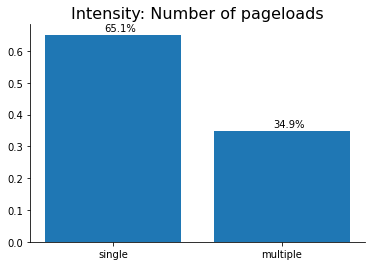

In [4]:
### bar plot: 1 or more unique pages

## pdf: linear binning
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(1,1,1)

## namespace access
label = "number namespaces beyond ns=0"
c=cm(0)
Z = df["n_ns0_unique"].values
xmin = np.min(Z)
xmax = np.max(Z)
bins = [1,2,xmax+1]
H,edges = np.histogram(Z,bins=bins)
H = H/np.sum(H)

x_labels = ["single","multiple"]
x_plot = np.arange(len(x_labels))

y_plot = H
ax.bar(x_plot,y_plot)
print(H)
# H=np.append(H,0)
for i,j in zip(x_plot,y_plot):
    text = "%s%%"%(np.round(j*100,2))
    ax.annotate(text,xy=(i-0.05,j+0.01))
ax.set_xticks(x_plot)
ax.set_xticklabels(x_labels)
ax.set_title("Intensity: Number of pageloads")

### Regularity: days since last access

- there are many entries with d=None(-1) or d=0. investigate whether this make sense

[ 57147 135039 155121  91574]
[0.13021069 0.30768933 0.35344661 0.20865337]


Text(0.5, 1.0, 'Regularity: days since last access')

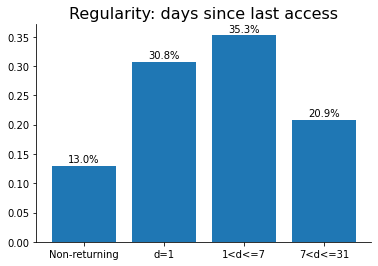

In [5]:
## pdf: linear binning
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(1,1,1)
Z = df["delta_days"].values
Z = np.nan_to_num(Z,nan=-1)

xmin = np.min(Z)
xmax = np.max(Z)
bins = [-1,1,2,8,31]
H,edges = np.histogram(Z,bins=bins)
print(H)
H = H/np.sum(H)
x_labels = ["Non-returning","d=1","1<d<=7","7<d<=31",]
x_plot = np.arange(len(x_labels))

y_plot = H
ax.bar(x_plot,y_plot)
print(H)
# H=np.append(H,0)
for i,j in zip(x_plot,y_plot):
    text = "%s%%"%(np.round(j*100,1))
    ax.annotate(text,xy=(i-0.2,j+0.005))
ax.set_xticks(x_plot)
ax.set_xticklabels(x_labels)
ax.set_title("Regularity: days since last access")

### Familiarity: Non-main-namespace content

- how many readers accessed only main namespace articles vs also at least one other namespace?

[0.99164466 0.00835534]


Text(0.5, 1.0, 'Familiarity: non-encyclopedic content')

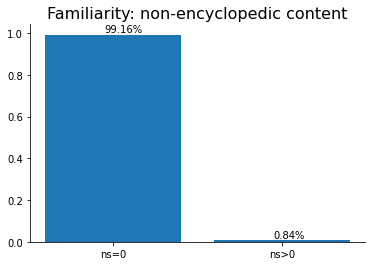

In [30]:
### Bar plot: 0 or more than 1

## pdf: linear binning
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(1,1,1)

## session length: pageviews
label = "number namespaces beyond ns=0"
c=cm(0)
Z = df["n_ns_unique"].values
xmin = np.min(Z)
xmax = np.max(Z)
bins = [0,1,xmax+1]
H,edges = np.histogram(Z,bins=bins)
H = H/np.sum(H)

x_labels = ["ns=0","ns>0"]
x_plot = np.arange(len(x_labels))

y_plot = H
ax.bar(x_plot,y_plot)
print(H)
# H=np.append(H,0)
for i,j in zip(x_plot,y_plot):
    text = "%s%%"%(np.round(j*100,2))
    ax.annotate(text,xy=(i-0.05,j+0.01))
ax.set_xticks(x_plot)
ax.set_xticklabels(x_labels)
ax.set_title("Familiarity: non-encyclopedic content")

# Multidimensional plots

combine the different facets.

How to visualize the 2x4x2 binning?

- maybe we can just put into 2 groups with 2x4 matrix?
    - make 2 different 2x4 plots for only main-namespace readers and non-main-namespace readers, respectively


### Regularity vs Intensity

[ 44665  71374 100908  68760]
[12482 63665 54213 22814]


Text(0.5, 1.0, 'Regularity vs Intensity')

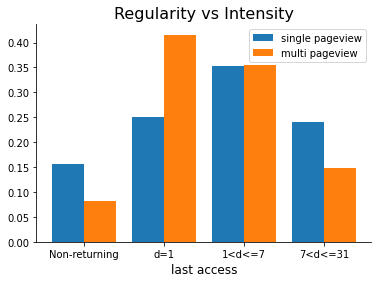

In [7]:
## pdf: linear binning
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(1,1,1)

x_labels = ["Non-returning","d=1","1<d<=7","7<d<=31",]

## single pageview
label="single pageview"
Z = df[df["n_ns0_unique"]==1]["delta_days"].values
Z = np.nan_to_num(Z,nan=-1)
xmin = np.min(Z)
xmax = np.max(Z)
bins = [-1,1,2,8,31]
H,edges = np.histogram(Z,bins=bins)
print(H)
H = H/np.sum(H)
x_plot = np.arange(len(x_labels))
y_plot = H
ax.bar(x_plot-0.2,y_plot,label = label, width=0.4)

## multiple pageviews
## single pageview
label="multi pageview"
Z = df[df["n_ns0_unique"]>1]["delta_days"].values
Z = np.nan_to_num(Z,nan=-1)
xmin = np.min(Z)
xmax = np.max(Z)
bins = [-1,1,2,8,31]
H,edges = np.histogram(Z,bins=bins)
print(H)
H = H/np.sum(H)
x_plot = np.arange(len(x_labels))
y_plot = H
ax.bar(x_plot+0.2,y_plot,label = label, width=0.4)

ax.legend()
ax.set_xticks(x_plot)
ax.set_xticklabels(x_labels)
ax.set_xlabel("last access")
ax.set_title("Regularity vs Intensity")

Conclusion: readers who read more pages, also visit more regularly

read: if you do multiple pageviews, then it is more likely that you return the next day (almost 100% more likely)

### Intensity vs regularity

Conclusion: same as above, i.e. readers who visit frequently (d=1) have a higher chance of also reading more pages

read: if you return the next day, then it is much more likely that you will read more than one page.

### Intensity vs Familiar

[284636 150578]
[1071 2596]


Text(0.5, 1.0, 'Intensity vs Familiarity')

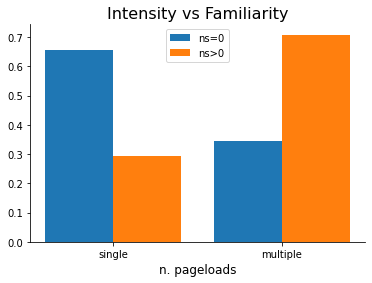

In [29]:
## pdf: linear binning
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(1,1,1)

x_labels = ["single","multiple"]

## single pageview
label="ns=0"
Z = df[df["n_ns_unique"]==0]["n_ns0_unique"].values
Z = np.nan_to_num(Z,nan=-1)
xmin = np.min(Z)
xmax = np.max(Z)
bins = [1,2,xmax+1]
H,edges = np.histogram(Z,bins=bins)
print(H)
H = H/np.sum(H)
x_plot = np.arange(len(x_labels))
y_plot = H
ax.bar(x_plot-0.2,y_plot,label = label, width=0.4)

## multiple pageviews
## single pageview
label="ns>0"
Z = df[df["n_ns_unique"]>0]["n_ns0_unique"].values
Z = np.nan_to_num(Z,nan=-1)
xmin = np.min(Z)
xmax = np.max(Z)
bins = [1,2,xmax+1]
H,edges = np.histogram(Z,bins=bins)
print(H)
H = H/np.sum(H)
x_plot = np.arange(len(x_labels))
y_plot = H
ax.bar(x_plot+0.2,y_plot,label = label, width=0.4)

ax.legend()
ax.set_xticks(x_plot)
ax.set_xticklabels(x_labels)
ax.set_xlabel("n. pageloads")
ax.set_title("Intensity vs Familiarity")

Conclusion: Readers who are more familiar with Wikipedia also read more pages per session. 
Specifically, fraction of readers who read multiple pages increases more than two-fold from 30% to 70%


read: if you visit beyond main namespace, then it is much much more likely that you visit multiple pageviews.
- baseline: 34.9%
- delta_days=1: 50%
- beyond ns=0: 70%

this suggests some path.

### Regularity vs Familiarity

[0.12994757 0.3070949  0.35396839 0.20898914]
[0.16143987 0.37823834 0.29151895 0.16880284]


Text(0.5, 1.0, 'Regularity vs Familiarity')

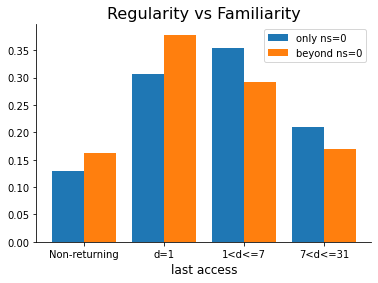

In [66]:
## pdf: linear binning
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(1,1,1)

x_labels = ["Non-returning","d=1","1<d<=7","7<d<=31",]

## single pageview
label="only ns=0"
Z = df[df["n_ns_unique"]==0]["delta_days"].values
Z = np.nan_to_num(Z,nan=-1)
xmin = np.min(Z)
xmax = np.max(Z)
bins = [-1,1,2,8,31]
H,edges = np.histogram(Z,bins=bins)
H = H/np.sum(H)
print(H)
x_plot = np.arange(len(x_labels))
y_plot = H
ax.bar(x_plot-0.2,y_plot,label = label, width=0.4)

## multiple pageviews
## single pageview
label="beyond ns=0"
Z = df[df["n_ns_unique"]>0]["delta_days"].values
Z = np.nan_to_num(Z,nan=-1)
xmin = np.min(Z)
xmax = np.max(Z)
bins = [-1,1,2,8,31]
H,edges = np.histogram(Z,bins=bins)
H = H/np.sum(H)
print(H)

x_plot = np.arange(len(x_labels))
y_plot = H
ax.bar(x_plot+0.2,y_plot,label = label, width=0.4)

ax.legend()
ax.set_xticks(x_plot)
ax.set_xticklabels(x_labels)
ax.set_xlabel("last access")
ax.set_title("Regularity vs Familiarity")

Read: if you visit beyond ns=0, then it is more likely you will visit next day.
- baseline: 30.8%
- multiple pageviews: 41%
- beyond ns=0: 37.8%

[0.15604843 0.24996135 0.35330387 0.24068635]
[0.08060939 0.41509384 0.35522453 0.14907224]
[0.23155929 0.21101774 0.32212885 0.23529412]
[0.13251156 0.4472265  0.2788906  0.14137134]


Text(0.5, 1.0, 'Regularity vs Familiarity/Intensity')

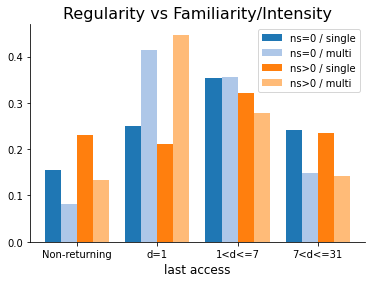

In [28]:
## pdf: linear binning
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(1,1,1)
cm=mpl.cm.get_cmap("tab20")


x_labels = ["Non-returning","d=1","1<d<=7","7<d<=31",]
width = 0.2

## ns=0 and single pageview
label="ns=0 / single"
c = cm(0)
Z = df[(df["n_ns_unique"]==0)&(df["n_ns0_unique"]==1)]["delta_days"].values
Z = np.nan_to_num(Z,nan=-1)
xmin = np.min(Z)
xmax = np.max(Z)
bins = [-1,1,2,8,31]
H,edges = np.histogram(Z,bins=bins)
H = H/np.sum(H)
print(H)
x_plot = np.arange(len(x_labels))
y_plot = H
ax.bar(x_plot-0.3,y_plot,label = label, width=width, color=c)

## ns=0 and multi pageview
label="ns=0 / multi"
c = cm(1)
Z = df[(df["n_ns_unique"]==0)&(df["n_ns0_unique"]>1)]["delta_days"].values
Z = np.nan_to_num(Z,nan=-1)
xmin = np.min(Z)
xmax = np.max(Z)
bins = [-1,1,2,8,31]
H,edges = np.histogram(Z,bins=bins)
H = H/np.sum(H)
print(H)
x_plot = np.arange(len(x_labels))
y_plot = H
ax.bar(x_plot-0.1,y_plot,label = label, width=width, color=c)

## ns>0 and single pageview
label="ns>0 / single"
c = cm(2)
Z = df[(df["n_ns_unique"]>0)&(df["n_ns0_unique"]==1)]["delta_days"].values
Z = np.nan_to_num(Z,nan=-1)
xmin = np.min(Z)
xmax = np.max(Z)
bins = [-1,1,2,8,31]
H,edges = np.histogram(Z,bins=bins)
H = H/np.sum(H)
print(H)
x_plot = np.arange(len(x_labels))
y_plot = H
ax.bar(x_plot+0.1,y_plot,label = label, width=width, color=c)

## ns>0 and multi pageview
label="ns>0 / multi"
c = cm(3)
Z = df[(df["n_ns_unique"]>0)&(df["n_ns0_unique"]>1)]["delta_days"].values
Z = np.nan_to_num(Z,nan=-1)
xmin = np.min(Z)
xmax = np.max(Z)
bins = [-1,1,2,8,31]
H,edges = np.histogram(Z,bins=bins)
H = H/np.sum(H)
print(H)
x_plot = np.arange(len(x_labels))
y_plot = H
ax.bar(x_plot+0.3,y_plot,label = label, width=width, color=c)

# ## multiple pageviews
# ## single pageview
# label="beyond ns=0"
# Z = df[df["n_ns_unique"]>0]["delta_days"].values
# Z = np.nan_to_num(Z,nan=-1)
# xmin = np.min(Z)
# xmax = np.max(Z)
# bins = [-1,1,2,8,31]
# H,edges = np.histogram(Z,bins=bins)
# H = H/np.sum(H)
# print(H)

# x_plot = np.arange(len(x_labels))
# y_plot = H
# ax.bar(x_plot+0.2,y_plot,label = label, width=0.4)

ax.legend()
ax.set_xticks(x_plot)
ax.set_xticklabels(x_labels)
ax.set_xlabel("last access")
ax.set_title("Regularity vs Familiarity/Intensity")

# Sandbox old

### Intensity

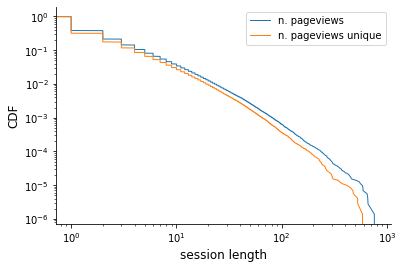

In [5]:
## cumulative
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(1,1,1)

## session length: pageviews
label = "n. pageviews"
c = cm(0)
Z = df["n_ns0"].values
N = len(Z)
x_plot = np.sort(Z)
y_plot = 1-(np.arange(N)+1)/N
ax.plot(x_plot,y_plot,lw=1,label=label,c=c)

## session length: unique pageviews
label = "n. pageviews unique"
c = cm(1)
Z = df["n_ns0_unique"].values
N = len(Z)
x_plot = np.sort(Z)
y_plot = 1-(np.arange(N)+1)/N
ax.plot(x_plot,y_plot,lw=1,label=label,c=c)



ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("session length")
ax.set_ylabel("CDF")
ax.legend(loc="upper right")
# H,edges = np.histogram(x,bins=10,density=True)
# H=np.append(0,H)
# ax.step(edges,H,where="pre", ls=':')

Text(0, 0.5, 'pdf')

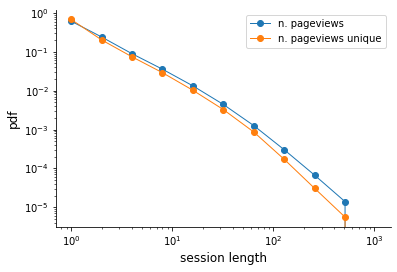

In [6]:
## pdf: log-binning
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(1,1,1)

## session length: pageviews
label = "n. pageviews"
c=cm(0)
Z = df["n_ns0"].values
xmin = np.min(Z)
xmax = np.max(Z)
bins = np.arange(xmin,xmax+1,1)
bins = np.logspace(0,int(np.log2(xmax)+1), int(np.log2(xmax)+1)+1 ,base=2)
H,edges = np.histogram(Z,bins=bins)
H=np.append(H,0)

x_plot = edges
y_plot = H/np.sum(H)
ax.plot(x_plot,y_plot,marker="o",c=c,lw=1,label=label)

## session length: pageviews unique
label = "n. pageviews unique"
c=cm(1)
Z = df["n_ns0_unique"].values
xmin = np.min(Z)
xmax = np.max(Z)
bins = np.arange(xmin,xmax+1,1)
bins = np.logspace(0,int(np.log2(xmax)+1), int(np.log2(xmax)+1)+1 ,base=2)
H,edges = np.histogram(Z,bins=bins)
H=np.append(H,0)

x_plot = edges
y_plot = H/np.sum(H)
ax.plot(x_plot,y_plot,marker="o",c=c,lw=1,label=label)

ax.legend(loc="upper right")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("session length")
ax.set_ylabel("pdf")

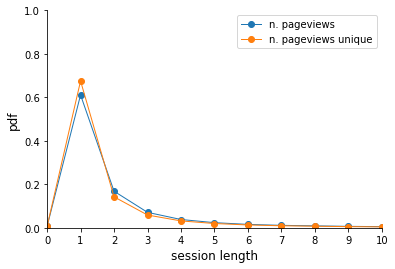

In [7]:
## pdf: linear binning
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(1,1,1)

## session length: pageviews
label = "n. pageviews"
c=cm(0)
Z = df["n_ns0"].values
xmin = np.min(Z)
xmax = np.max(Z)
bins = np.arange(xmin,xmax+1,1)
# bins = np.logspace(0,int(np.log2(xmax)+1), int(np.log2(xmax)+1)+1 ,base=2)
H,edges = np.histogram(Z,bins=bins)
H=np.append(H,0)

x_plot = edges
y_plot = H/np.sum(H)
ax.plot(x_plot,y_plot,marker="o",c=c,lw=1,label=label)

## session length: pageviews unique
label = "n. pageviews unique"
c=cm(1)
Z = df["n_ns0_unique"].values
xmin = np.min(Z)
xmax = np.max(Z)
bins = np.arange(xmin,xmax+1,1)
# bins = np.logspace(0,int(np.log2(xmax)+1), int(np.log2(xmax)+1)+1 ,base=2)
H,edges = np.histogram(Z,bins=bins)
H=np.append(H,0)

x_plot = edges
y_plot = H/np.sum(H)
ax.plot(x_plot,y_plot,marker="o",c=c,lw=1,label=label)

ax.legend(loc="upper right")
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("session length")
ax.set_ylabel("pdf")
ax.set_xlim(0,10)
ax.set_ylim(0,1)
ax.set_xticks(range(0,11))

### Regularity

In [ ]:
# # split by desktop and mobile

# ## pdf: linear binning
# fig = plt.figure(figsize=(6,4 ))
# ax = fig.add_subplot(1,1,1)

# label = "desktop"
# Z = df[df["access_method"]=="desktop"]["delta_days"].values
# Z = np.nan_to_num(Z,nan=-1)
# xmin = np.min(Z)
# xmax = np.max(Z)
# bins = [-1,1,2,8,31]
# H,edges = np.histogram(Z,bins=bins)
# print(H)
# H = H/np.sum(H)
# x_labels = ["Non-returning","d=1","2<d<=7","7<d<=31",]
# x_plot = np.arange(len(x_labels))
# y_plot = H
# ax.bar(x_plot-0.2,y_plot,label = label, width=0.4)

# label = "mobile-web"
# Z = df[df["access_method"]=="mobile web"]["delta_days"].values
# Z = np.nan_to_num(Z,nan=-1)
# xmin = np.min(Z)
# xmax = np.max(Z)
# bins = [-1,1,2,8,31]
# H,edges = np.histogram(Z,bins=bins)
# print(H)
# H = H/np.sum(H)
# x_labels = ["Non-returning","d=1","2<d<=7","7<d<=31",]
# x_plot = np.arange(len(x_labels))
# y_plot = H
# ax.bar(x_plot+0.2,y_plot,label = label, width=0.4)

# ax.set_xticks(x_plot)
# ax.set_xticklabels(x_labels)
# ax.set_title("Regularity: days since last access")
# ax.legend(loc="upper right")

### Familiarity

In [44]:
## pdf: linear binning
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(1,1,1)

## session length: pageviews
label = "number namespaces beyond ns=0"
c=cm(0)
Z = df["n_ns_unique"].values
xmin = np.min(Z)
xmax = np.max(Z)
bins = np.arange(xmin,xmax+1,1)
H,edges = np.histogram(Z,bins=bins)
H=np.append(H,0)

x_plot = edges[1:]
y_plot = (H/np.sum(H))[1:]
ax.plot(x_plot,y_plot,marker="o",c=c,lw=1,label=label)

# ax.legend(loc="upper right")

ax.set_xlabel("Number of non-main-namespaces accessed")
ax.set_ylabel("pdf")
# ax.set_ylim(0,1.1*max(y_plot[1:]))
# ax.set_yscale("log")
# ax.set_ylim(0,1)
# ax.set_xticks(range(0,11))

Text(0, 0.5, 'pdf')